In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

Suppose we have a website and are deciding if we wanna show an ad for Candidate A or Candidate B

In [3]:
action1 = np.zeros(2)
action1[0] = 1
action2 = np.zeros(2)
action2[1] = 1

In [4]:
def party_split(p=0.5):
    context = np.random.rand(2)
    context -= 0.5
    click = 0
    if context[0] < 0:
        if random.random() < p:
            click = 1
    else:
        click = 1

    return context, click

In [11]:
def simulation(N, T, STOP, gen_sample, unbiased):
    regret = 0
    reward = np.zeros(N)
    phi = np.zeros((N,2))
    for i in range(N):
        if(i < STOP):
            x, click = gen_sample()
        else:
            x, click = unbiased()

        rand_indx = np.random.randint(0,2)
        action = np.zeros(2)
        action[rand_indx] += 1
        phi[i] = x * action
        if rand_indx == click:
            reward[i] = 1
        else:
            regret += 1
            pass

    theta = np.linalg.lstsq(phi,reward,rcond=None)[0]
    for i in range(N,T):
        if(i < STOP):
            x, click = gen_sample()
        else:
            x, click = unbiased()
        r1 = theta @ (x*action1)
        r2 = theta @ (x*action2)
        if r1 > r2:
            regret += (click != 0)
        else:
            regret += (click == 0)

    return regret

In [14]:
def big_sim(GRAN,TRIALS,EXPLORE,EXPLOIT,HIJACK,gen_func):
    x = []
    y = []
    for i in range(GRAN):
        for _ in range(TRIALS):
            prob = i/GRAN
            x.append(prob)
            hijacked = lambda: gen_func(p=prob)
            unaltered = lambda: gen_func(p=0)
            y.append(simulation(EXPLORE,EXPLORE+EXPLOIT,HIJACK,hijacked,unaltered))


    plt.scatter(x, y)
    plt.show()

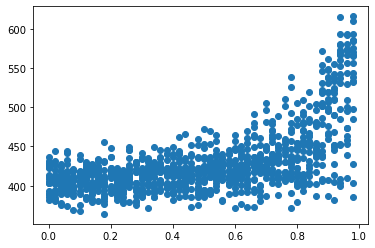

In [15]:
GRAN = 50
TRIALS = 20
EXPLORE = 800
EXPLOIT = 400
HIJACK = 800
big_sim(GRAN,TRIALS,EXPLORE,EXPLOIT,HIJACK,party_split)

In [18]:
def party_split2(p=0.5):
    context = np.random.rand(2)
    context -= 0.5
    click = 0
    if context[0]+context[1] < 0:
        if random.random() < p:
            click = 1
    else:
        click = 1

    return context, click

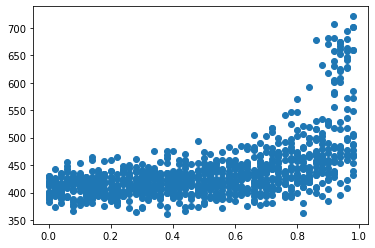

In [19]:
big_sim(GRAN,TRIALS,EXPLORE,EXPLOIT,HIJACK,party_split2)

In [24]:
# This is a situation in which the bots have some sort of boundedness
def party_split3(p=0.5, bound=0.3):
    context = np.random.rand(2)
    context -= 0.5
    if context[0] < 0:
        click = 0
        if random.random() < p:
            context[0] += bound
    else:
        click = 1

    return context, click

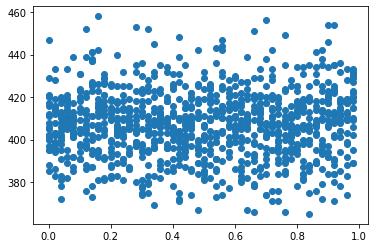

In [28]:
big_sim(GRAN,TRIALS,EXPLORE,EXPLOIT,HIJACK,lambda p: party_split3(p=p,bound=0.1))

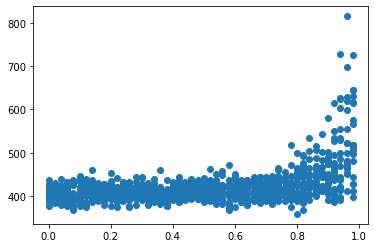

In [29]:
big_sim(GRAN,TRIALS,EXPLORE,EXPLOIT,HIJACK,lambda p: party_split3(p=p,bound=0.25))

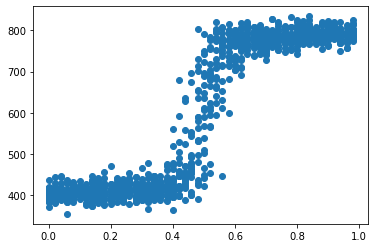

In [30]:
big_sim(GRAN,TRIALS,EXPLORE,EXPLOIT,HIJACK,lambda p: party_split3(p=p,bound=0.5))

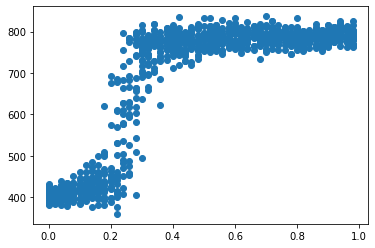

In [26]:
big_sim(GRAN,TRIALS,EXPLORE,EXPLOIT,HIJACK,lambda p: party_split3(p=p,bound=1))

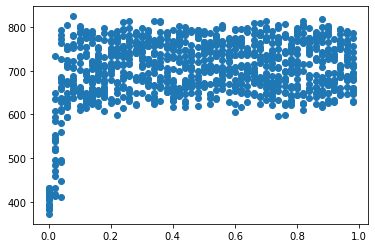

In [27]:
big_sim(GRAN,TRIALS,EXPLORE,EXPLOIT,HIJACK,lambda p: party_split3(p=p,bound=10))

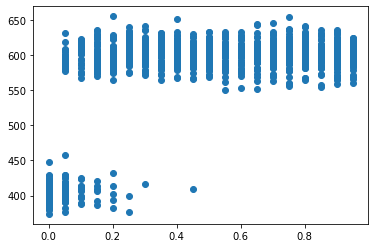

In [34]:
# Even if the adversaries are only hanging around for a little bit, if they are powerful enough they can 
big_sim(20,50,EXPLORE,EXPLOIT,50,lambda p: party_split3(p=p,bound=100000))

In [35]:
def party_split4(p=0.5, bound=0.3):
    context = np.random.rand(2)
    context -= 0.5
    if context[0]+context[1] < 0:
        click = 0
        if random.random() < p:
            mindx = np.argmin(context)
            context[mindx] += bound
    else:
        click = 1

    return context, click

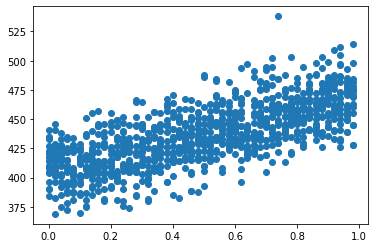

In [38]:
big_sim(GRAN,TRIALS,EXPLORE,EXPLOIT,HIJACK,lambda p: party_split4(p=p,bound=0.25))

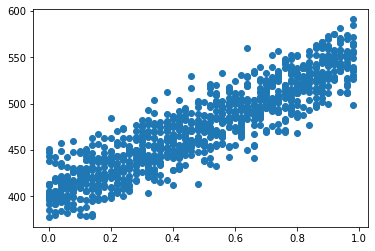

In [37]:
big_sim(GRAN,TRIALS,EXPLORE,EXPLOIT,HIJACK,lambda p: party_split4(p=p,bound=0.5))

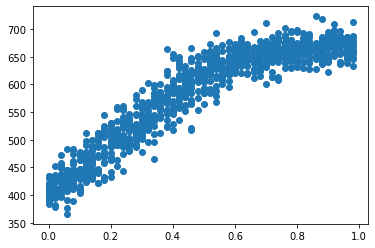

In [39]:
big_sim(GRAN,TRIALS,EXPLORE,EXPLOIT,HIJACK,lambda p: party_split4(p=p,bound=1.5))

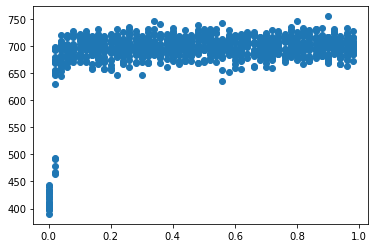

In [41]:
big_sim(GRAN,TRIALS,EXPLORE,EXPLOIT,HIJACK,lambda p: party_split4(p=p,bound=100))